## Loading Dataset

In [249]:
import pandas as pd
import numpy as np

In [251]:
df=pd.read_csv('ToyotaCorolla.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


 ## Perform EDA and Data Preprocessing

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [255]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [257]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [259]:
df.columns.tolist()

['Price',
 'Age_08_04',
 'KM',
 'Fuel_Type',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [261]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

## Visualizations

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

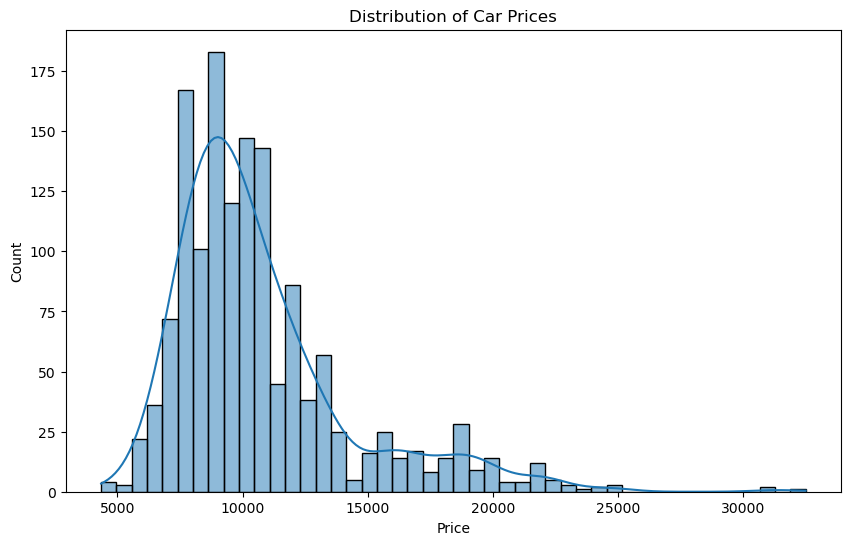

In [265]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.show()

Text(0.5, 1.0, 'Pair Plot of Numeric Features')

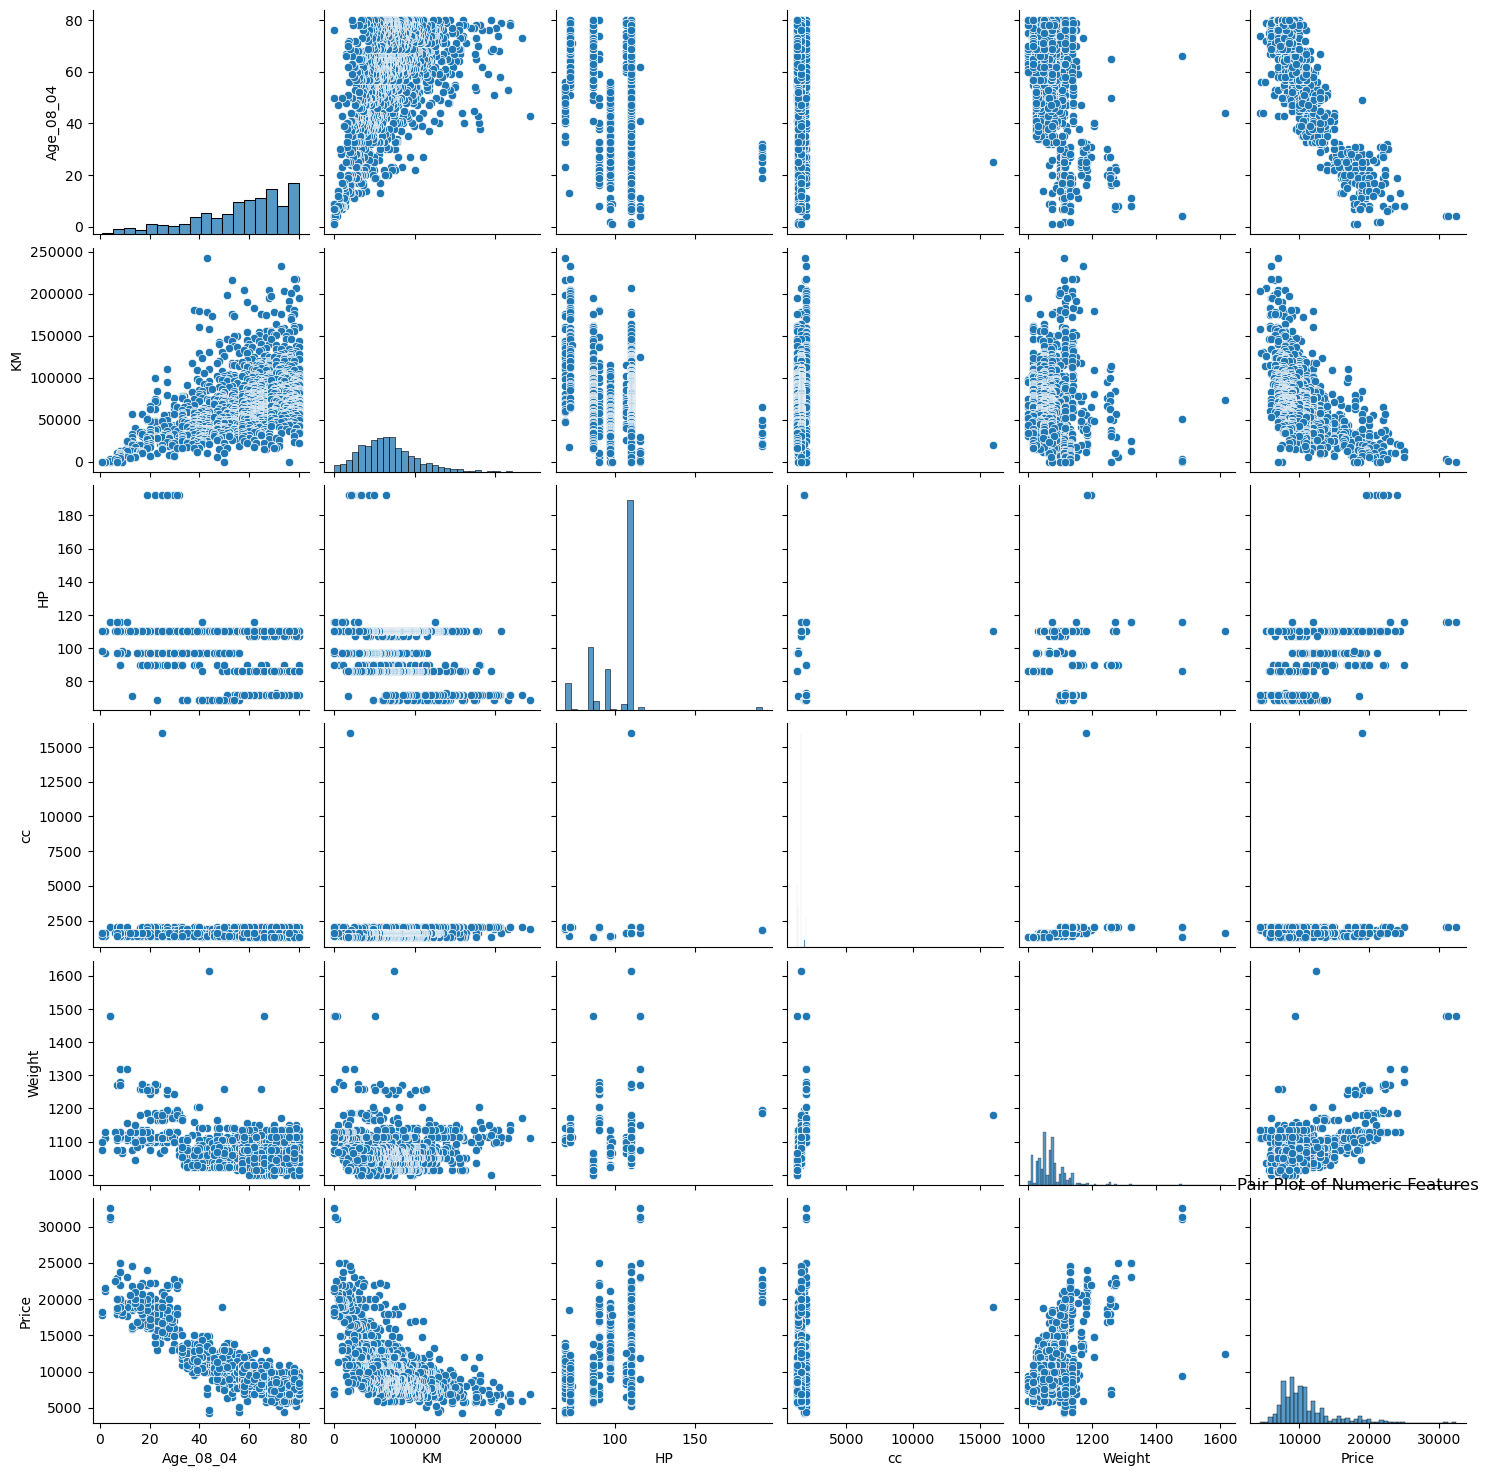

In [266]:
sns.pairplot(df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']])
plt.title('Pair Plot of Numeric Features')

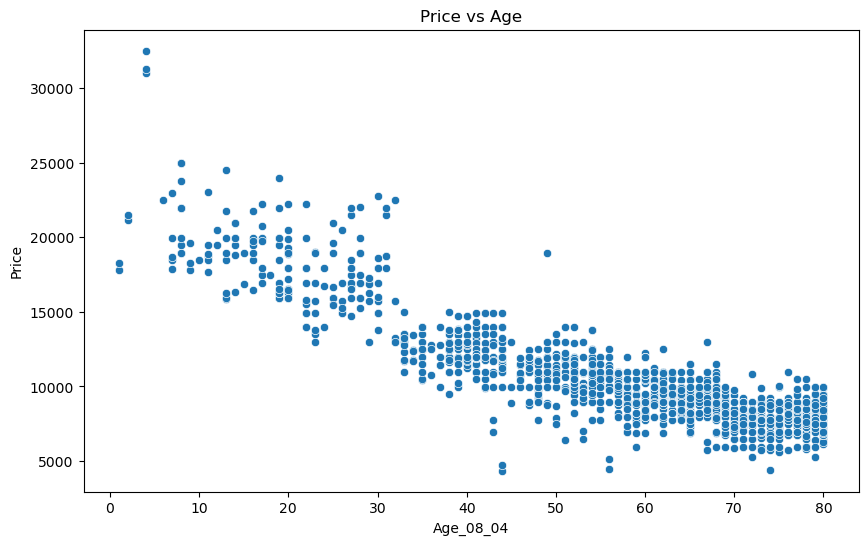

In [268]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age_08_04", y="Price")
plt.title("Price vs Age")
plt.show()

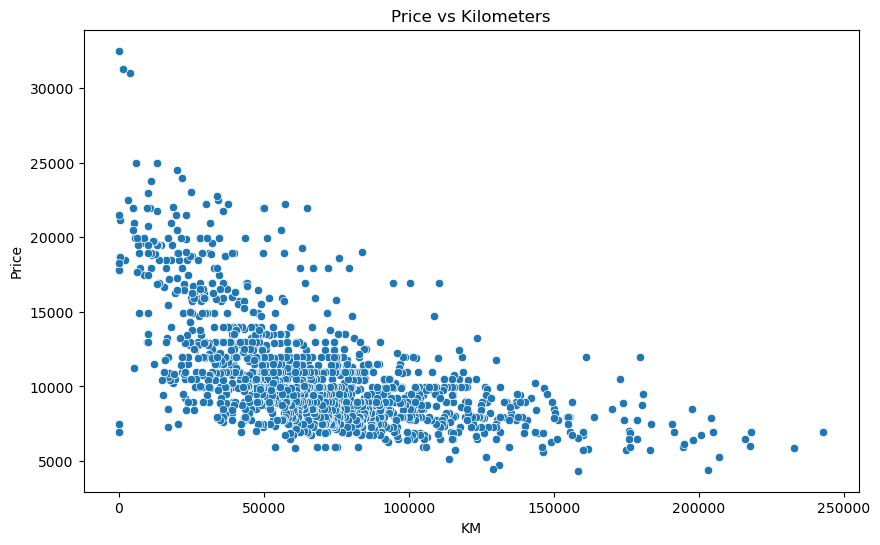

In [269]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="KM", y="Price")
plt.title("Price vs Kilometers")
plt.show()


## Additional preprocessing: Encode categorical variables

In [314]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Identify categorical columns and apply one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type_Petrol_True', 'Doors_3_True', 'Automatic_1_True'], drop_first=True)

# Confirm encoding by printing the first few rows
print(df.head())


   Price  Age_08_04     KM  HP    cc  Cylinders  Gears  Weight  \
0  13500         23  46986  90  2000          4      5    1165   
1  13750         23  72937  90  2000          4      5    1165   
2  13950         24  41711  90  2000          4      5    1165   
3  14950         26  48000  90  2000          4      5    1165   
4  13750         30  38500  90  2000          4      5    1170   

   Fuel_Type_Diesel  Doors_4  Doors_5  Fuel_Type_Petrol_True_True  \
0              True    False    False                       False   
1              True    False    False                       False   
2              True    False    False                       False   
3              True    False    False                       False   
4              True    False    False                       False   

   Doors_3_True_True  Automatic_1_True_True  
0               True                  False  
1               True                  False  
2               True                  False  
3   

##  Split the Dataset

In [368]:
from sklearn.model_selection import train_test_split

In [370]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Build Multiple Linear Regression Models

In [397]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [399]:
from sklearn.pipeline import Pipeline
pipeline_std = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipeline_std.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [425]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores for Model 3:", cv_scores)

Cross-validated R2 scores for Model 3: [0.87281683 0.11725873 0.87635118 0.86907233 0.77158974]


##  Evaluate Model Performance

In [427]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred1 = model1.predict(X_test)
print("Model 1 - RMSE:", mean_squared_error(y_test, y_pred1, squared=False))
print("Model 1 - R2 Score:", r2_score(y_test, y_pred1))

Model 1 - RMSE: 1494.1060310168155
Model 1 - R2 Score: 0.8326921861635723


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [429]:
y_pred2 = pipeline_std.predict(X_test)
print("Model 2 - RMSE:", mean_squared_error(y_test, y_pred2, squared=False))
print("Model 2 - R2 Score:", r2_score(y_test, y_pred2))


Model 2 - RMSE: 1494.1060310168164
Model 2 - R2 Score: 0.8326921861635721


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##  Apply Lasso and Ridge Regression

In [432]:
from sklearn.linear_model import Lasso,Ridge 
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso - RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("Lasso - R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso - RMSE: 1490.7196076735495
Lasso - R2 Score: 0.8334497401754692


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [434]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge - RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("Ridge - R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge - RMSE: 1492.3513488695867
Ridge - R2 Score: 0.8330849289034395


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Interview Questions

### 1. What is Normalization & Standardization?

* Normalization scales each feature to a [0, 1] range and is useful when features have different ranges.

* Standardization centers features around the mean with a standard deviation of 1, beneficial when features have similar ranges but different distributions.

### 1. Addressing Multicollinearity
* Variance Inflation Factor (VIF): High VIF scores indicate multicollinearity.

* Regularization Techniques: Lasso and Ridge regression help reduce multicollinearity by penalizing high coefficients.